In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [4]:
#loading dataset
df = pd.read_csv("creditcard.csv")
print(df.head())
print(df['Class'].value_counts())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [9]:
col_names = df.columns
col_names

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [10]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

(284807, 30)

In [ ]:
# Show statistical summary of numerical features with 2 decimal rounding
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
V1,284807.0,0.0,1.96,-56.41,-0.92,0.02,1.32,2.45
V2,284807.0,0.0,1.65,-72.72,-0.60,0.07,0.80,22.06
V3,284807.0,-0.0,1.52,-48.33,-0.89,0.18,1.03,9.38
V4,284807.0,0.0,1.42,-5.68,-0.85,-0.02,0.74,16.88
V5,284807.0,0.0,1.38,-113.74,-0.69,-0.05,0.61,34.80
V6,284807.0,0.0,1.33,-26.16,-0.77,-0.27,0.40,73.30
V7,284807.0,-0.0,1.24,-43.56,-0.55,0.04,0.57,120.59
V8,284807.0,0.0,1.19,-73.22,-0.21,0.02,0.33,20.01
V9,284807.0,-0.0,1.10,-13.43,-0.64,-0.05,0.60,15.59
V10,284807.0,0.0,1.09,-24.59,-0.54,-0.09,0.45,23.75


In [12]:
# Count and print missing values per column
print(df.isnull().sum())

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [13]:
# Count and print occurrences of each fraud Class (0=normal, 1=fraud)
print(df["Class"].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


In [14]:
# Show percentage distribution of fraud classes
df["Class"].value_counts(normalize=True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

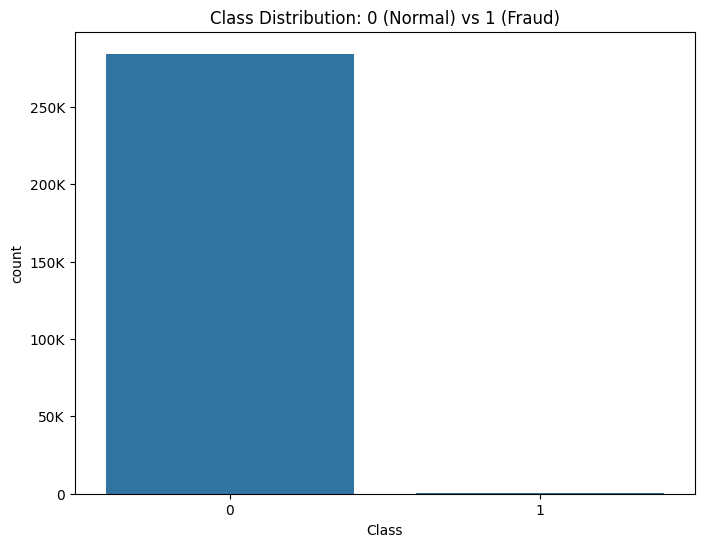

In [20]:
# Distribution of non-fraud and fraud cases
from matplotlib.ticker import FuncFormatter
def thousands_formatter(x, pos):
    abs_x = abs(x)
    if abs_x >= 1_000_000:
        formatted = f'{abs_x / 1_000_000:.2f}M'
    elif abs_x >= 1_000:
        formatted = f'{abs_x / 1_000:.0f}K'
    else:
        formatted = f'{int(abs_x)}'
    return f'-{formatted}' if x < 0 else formatted
plt.figure(figsize=(8,6))
sns.countplot(x="Class", data=df)
plt.title("Class Distribution: 0 (Normal) vs 1 (Fraud)")
ax = plt.gca()
formatter = FuncFormatter(thousands_formatter)
ax.yaxis.set_major_formatter(formatter)
plt.show()

In [21]:
# Count and print unique transaction amounts
print(df["Amount"].value_counts())

Amount
-0.349231    13688
-0.345313     6044
-0.349671     4872
-0.313289     4747
-0.293258     3280
             ...  
 0.455344        1
 0.657687        1
 2.107673        1
 0.370144        1
 2.875145        1
Name: count, Length: 32767, dtype: int64


In [22]:
# Show percentage distribution of transaction amounts
df["Amount"].value_counts(normalize=True)

Amount
-0.349231    0.048061
-0.345313    0.021221
-0.349671    0.017106
-0.313289    0.016667
-0.293258    0.011517
               ...   
 0.455344    0.000004
 0.657687    0.000004
 2.107673    0.000004
 0.370144    0.000004
 2.875145    0.000004
Name: proportion, Length: 32767, dtype: float64

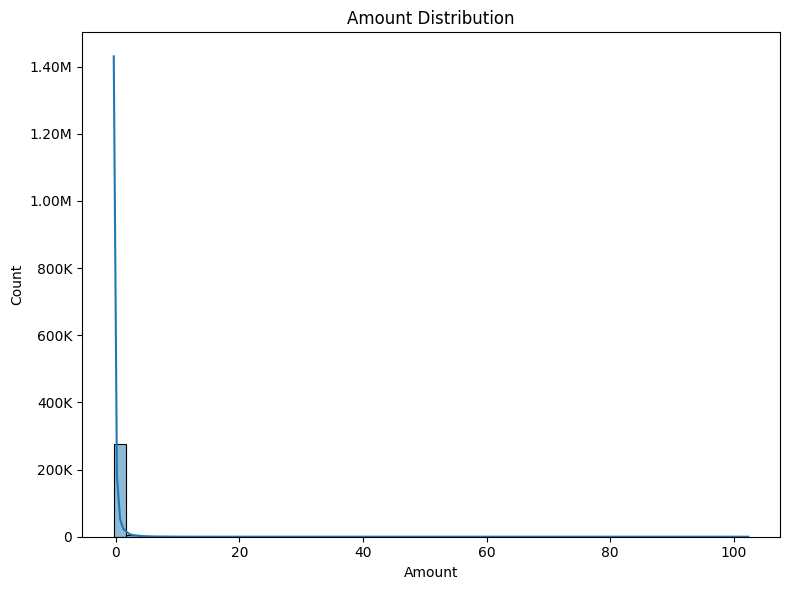

In [24]:
# Distribution of transaction Amount
def thousands_formatter(x, pos):
    abs_x = abs(x)
    if abs_x >= 1_000_000:
        formatted = f'{abs_x / 1_000_000:.2f}M'
    elif abs_x >= 1_000:
        formatted = f'{abs_x / 1_000:.0f}K'
    else:
        formatted = f'{int(abs_x)}'
    return f'-{formatted}' if x < 0 else formatted
plt.figure(figsize=(8,6))
sns.histplot(df["Amount"], bins=50, kde=True)
plt.title("Amount Distribution")
ax = plt.gca()
formatter = FuncFormatter(thousands_formatter)
ax.yaxis.set_major_formatter(formatter)
ax.xaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

In [5]:
# Count and print unique transaction times (duration)
df = pd.read_csv("creditcard.csv")
print(df["Time"].value_counts())

Time
163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
172760.0     1
172758.0     1
172757.0     1
172756.0     1
172754.0     1
Name: count, Length: 124592, dtype: int64


In [6]:
# Show percentage distribution of transaction times (duration)
df["Time"].value_counts(normalize=True)

Time
163152.0    0.000126
64947.0     0.000091
68780.0     0.000088
3767.0      0.000074
3770.0      0.000070
              ...   
172760.0    0.000004
172758.0    0.000004
172757.0    0.000004
172756.0    0.000004
172754.0    0.000004
Name: proportion, Length: 124592, dtype: float64

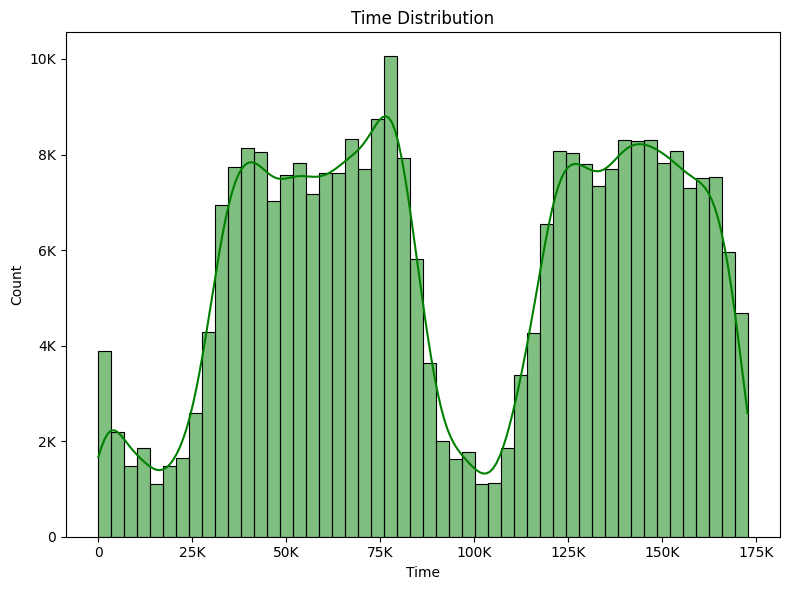

In [8]:
# Distribution of Time duration between transactions
def thousands_formatter(x, pos):
    abs_x = abs(x)
    if abs_x >= 1_000_000:
        formatted = f'{abs_x / 1_000_000:.2f}M'
    elif abs_x >= 1_000:
        formatted = f'{abs_x / 1_000:.0f}K'
    else:
        formatted = f'{int(abs_x)}'
    return f'-{formatted}' if x < 0 else formatted
plt.figure(figsize=(8,6))
sns.histplot(df["Time"], bins=50, kde=True, color="green")
plt.title("Time Distribution")
ax = plt.gca()
formatter = FuncFormatter(thousands_formatter)
ax.yaxis.set_major_formatter(formatter)
ax.xaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

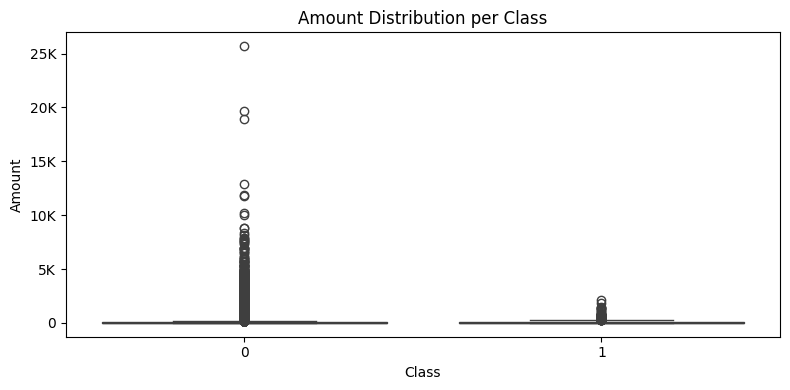

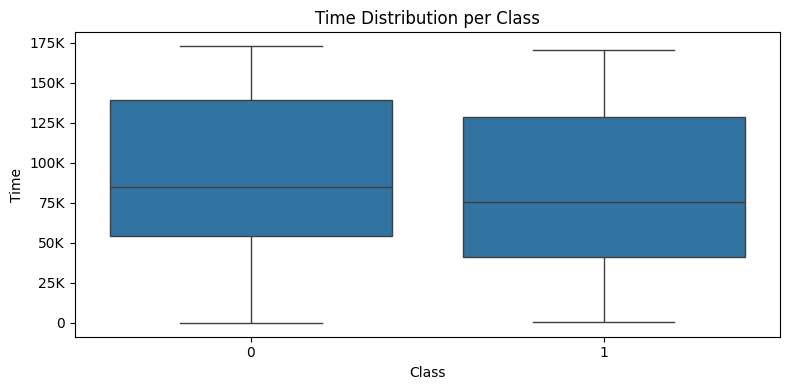

In [9]:
# Distribution of Time and Amount per Class (0=non-fraud, 1=fraud case) 
def thousands_formatter(x, pos):
    abs_x = abs(x)
    if abs_x >= 1_000_000:
        formatted = f'{abs_x / 1_000_000:.2f}M'
    elif abs_x >= 1_000:
        formatted = f'{abs_x / 1_000:.0f}K'
    else:
        formatted = f'{int(abs_x)}'
    return f'-{formatted}' if x < 0 else formatted
# Boxplot Figure 1: Amount vs Class
plt.figure(figsize=(8,4))
sns.boxplot(x="Class", y="Amount", data=df)
plt.title("Amount Distribution per Class")
ax1 = plt.gca()
formatter = FuncFormatter(thousands_formatter)
ax1.yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()
# Boxplot Figure 2: Time vs Class
plt.figure(figsize=(8,4))
sns.boxplot(x="Class", y="Time", data=df)
plt.title("Time Distribution per Class")
ax2 = plt.gca()
formatter = FuncFormatter(thousands_formatter)
ax2.yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

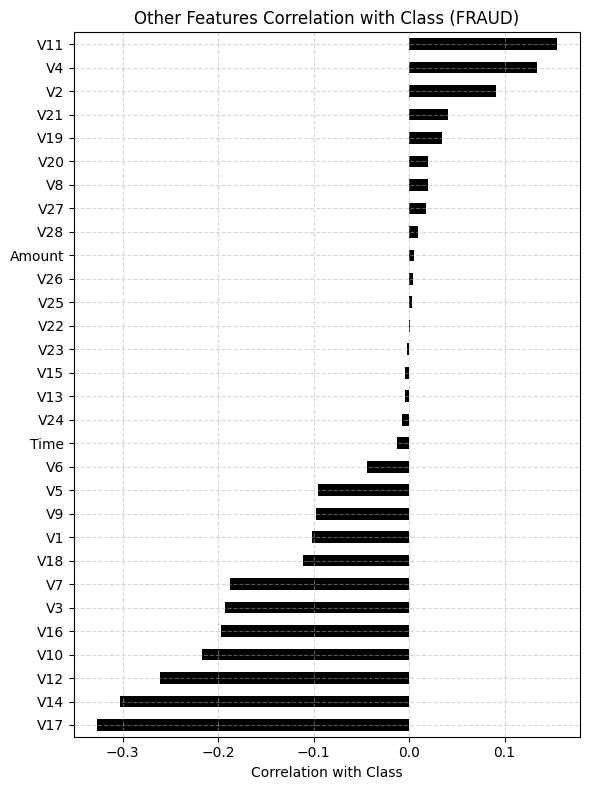

In [11]:
# Correlation between Features and Class 1 (Fraud)
correlations = df.corr()["Class"].drop("Class").sort_values()
plt.figure(figsize=(6, 8))
correlations.plot(kind="barh", color="black")
plt.title("Other Features Correlation with Class (FRAUD)")
plt.xlabel("Correlation with Class")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()